# Chronic Kidney Disease Detection--Group 6

In [ ]:
# Import Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [2]:
# Data Importing

df= pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
# Delete the id column
df.drop('id', axis = 1, inplace = True)

In [5]:
# Rename the column names 

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

# Data Preprocessing

In [9]:
# We first Converted necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [10]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [11]:
# Checking the unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



#### Data Cleaning

In [13]:
# Replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [14]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [15]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [16]:
# Checking the Missing Values Count

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [17]:
# Checking the Missing values
import matplotlib.style as style
style.use('fivethirtyeight')
style.use('seaborn-darkgrid')
d=((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)


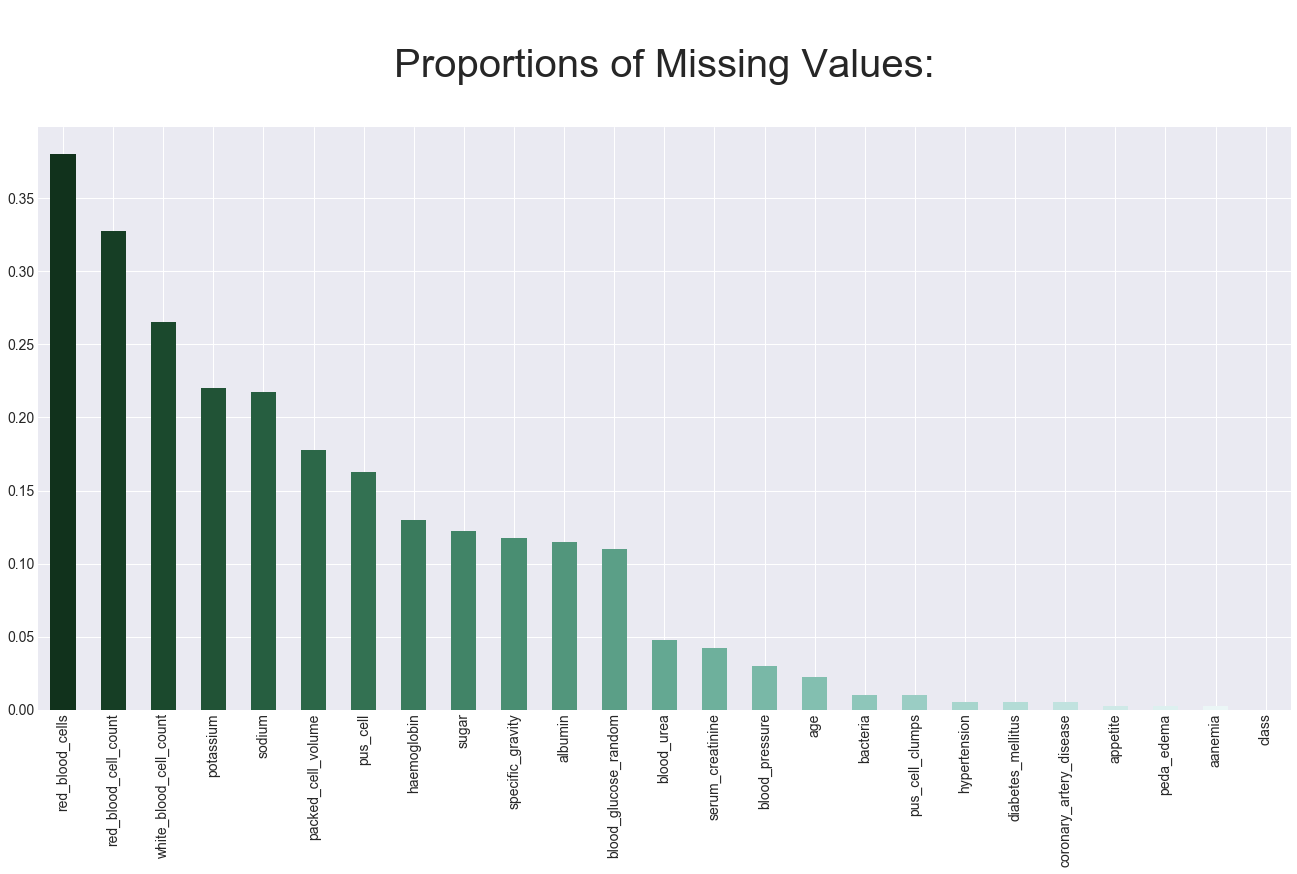

In [18]:
# Missing Values Plot
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

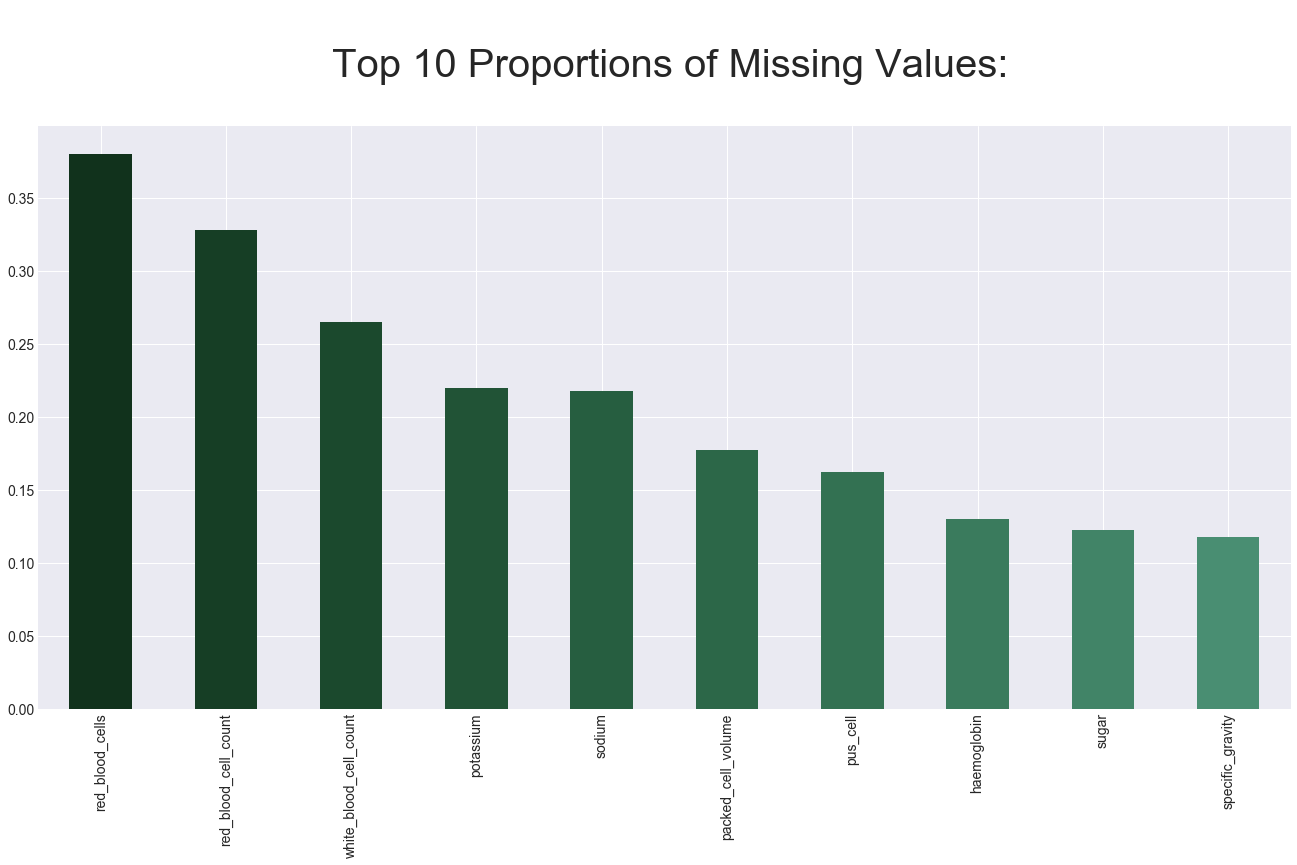

In [19]:
# Top 10 Missing Values Plot
top10 = d.head(10)
top10.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\n Top 10 Proportions of Missing Values:\n",fontsize=40)
plt.show()

#### We used two methods to fill with the null values: random sampling for higher null values and mean/mode sampling for lower null values

In [20]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [21]:
# Filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [22]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [23]:
# Using random sampling method and mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [24]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

As we can see, all null values have been handled

# Exploratory Data Analysis

Text(0.5, 1.0, 'Chronic Kidney Disease (percentages)')

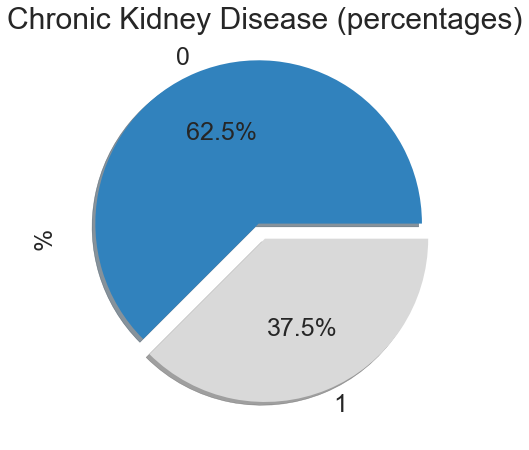

In [25]:
#Plot of our response variable
fig, ax = plt.subplots(figsize =(10, 7))
import seaborn
graph1 = df['class'].value_counts().plot.pie(autopct='%1.1f%%',
                                                              colormap='tab20c',
                                                              fontsize=25,
                                                              shadow=True,
                                                              explode=[0.1,0])
ax.set_ylabel("%",fontsize=25)
ax.set_title('Chronic Kidney Disease (percentages)',fontsize=30)


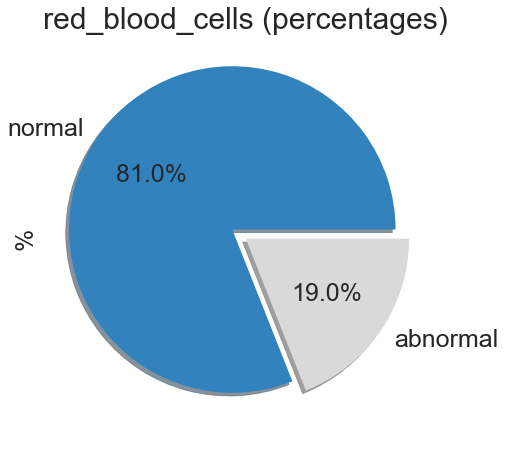

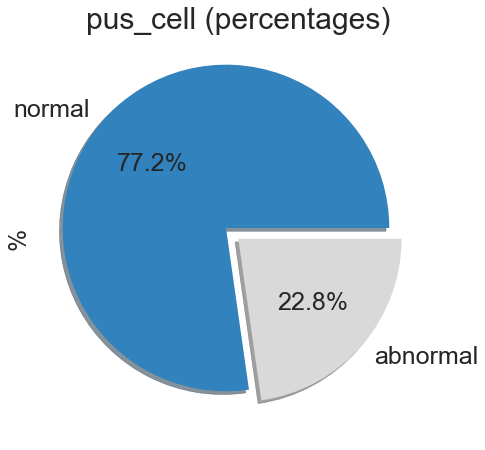

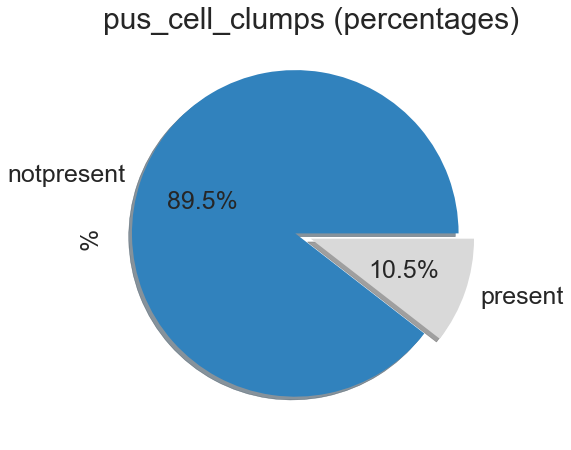

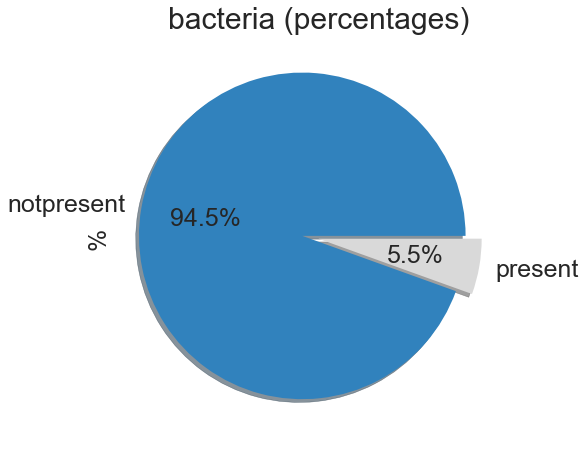

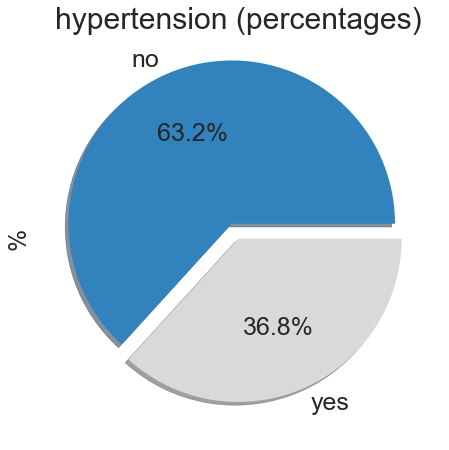

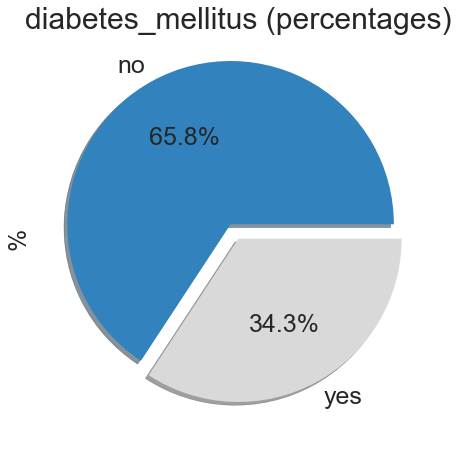

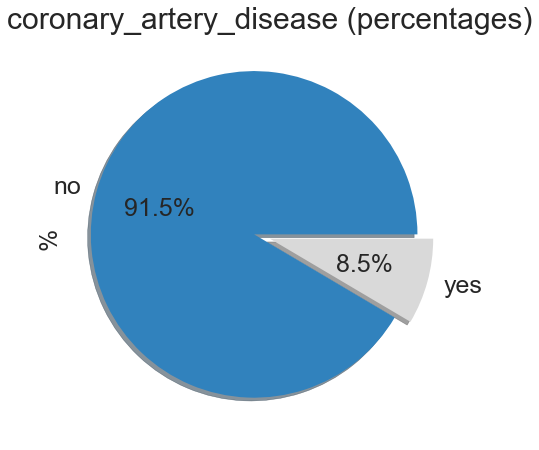

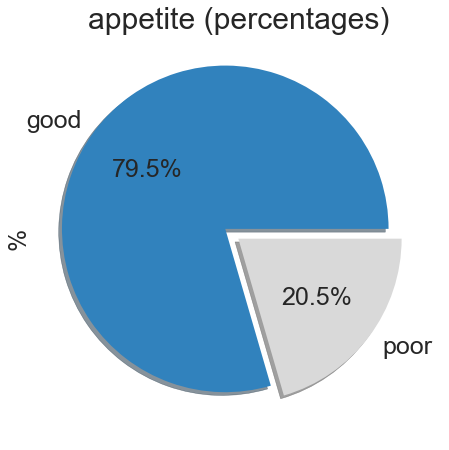

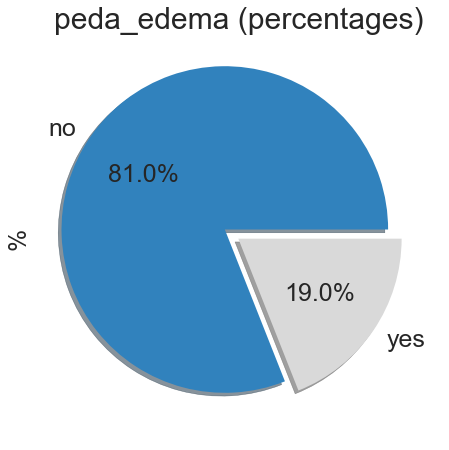

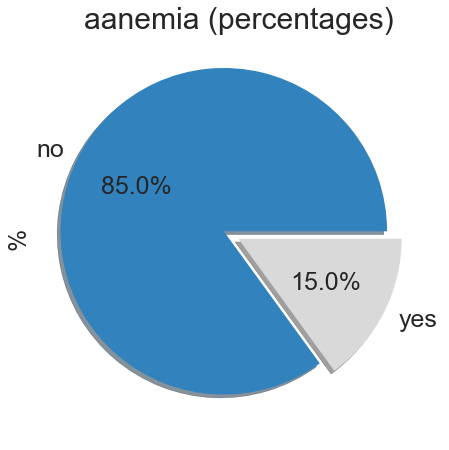

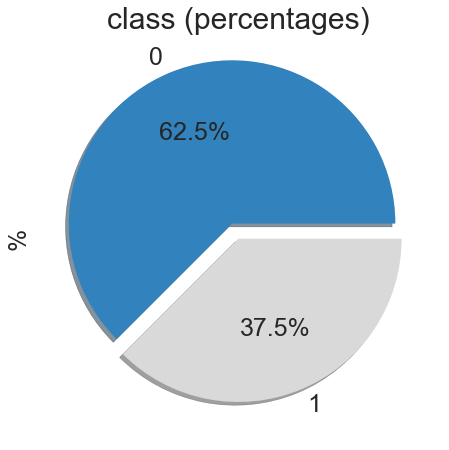

In [26]:
# For Categorical Features, we loop through features and generate pie chart
for i in cat_cols:
    fig, ax = plt.subplots(figsize=(10, 7))
    df[i].value_counts().plot.pie(
        autopct='%1.1f%%',
        colormap='tab20c',
        fontsize=25,
        shadow=True,
        explode=[0.1, 0],
        ax=ax
    )
    ax.set_ylabel("%", fontsize=25)
    ax.set_title(f"{i} (percentages)", fontsize=30)
    plt.show()

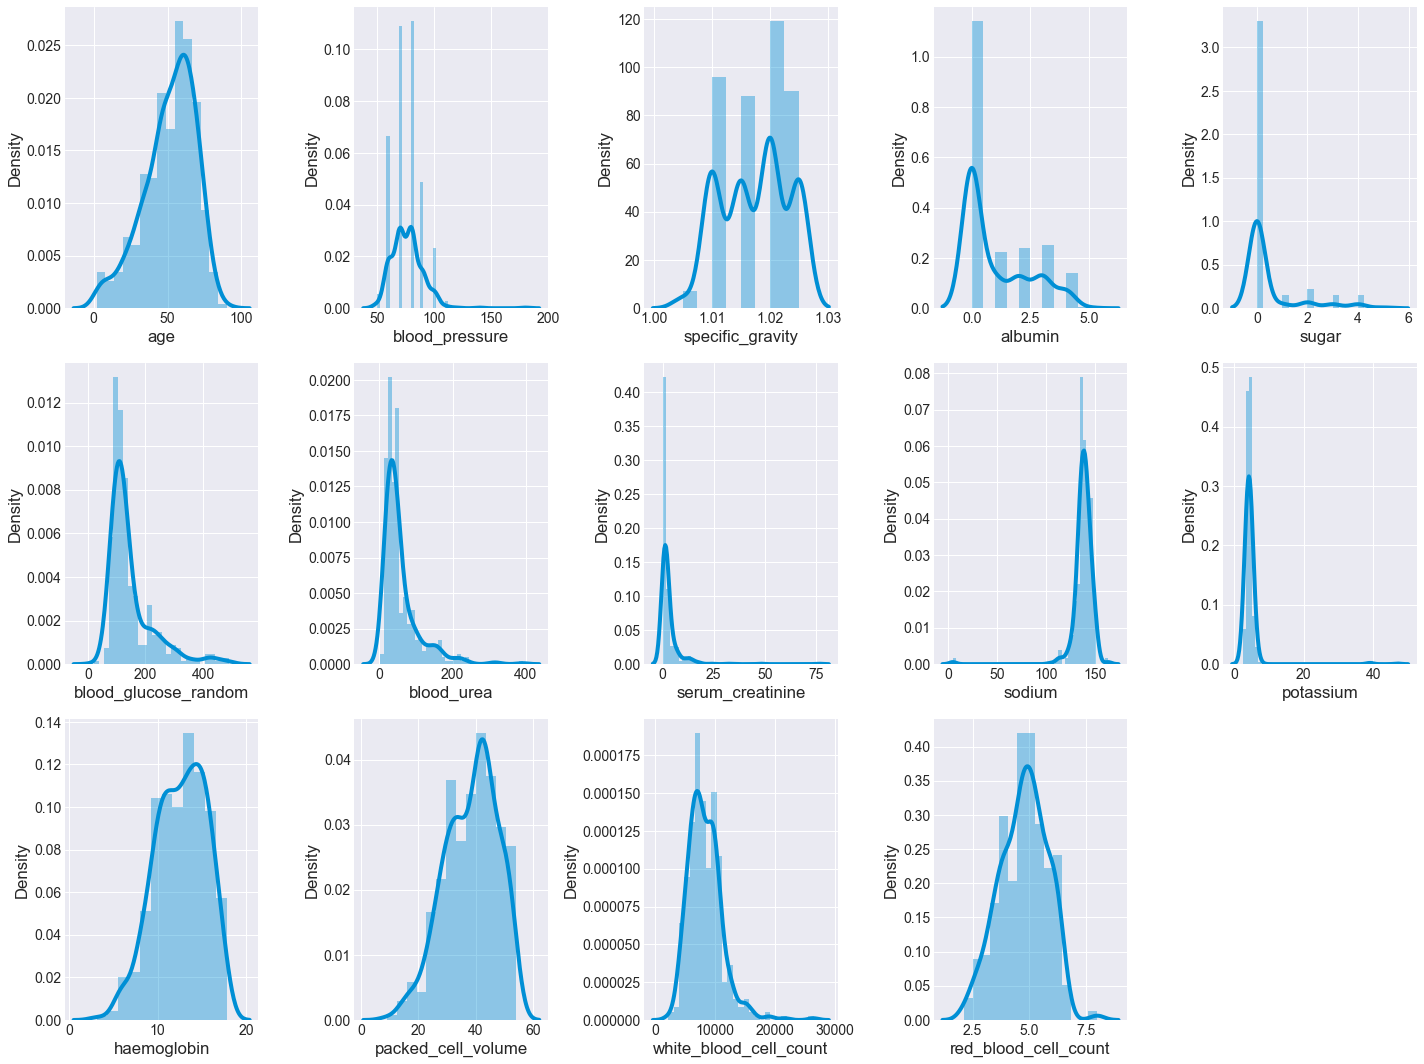

In [27]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

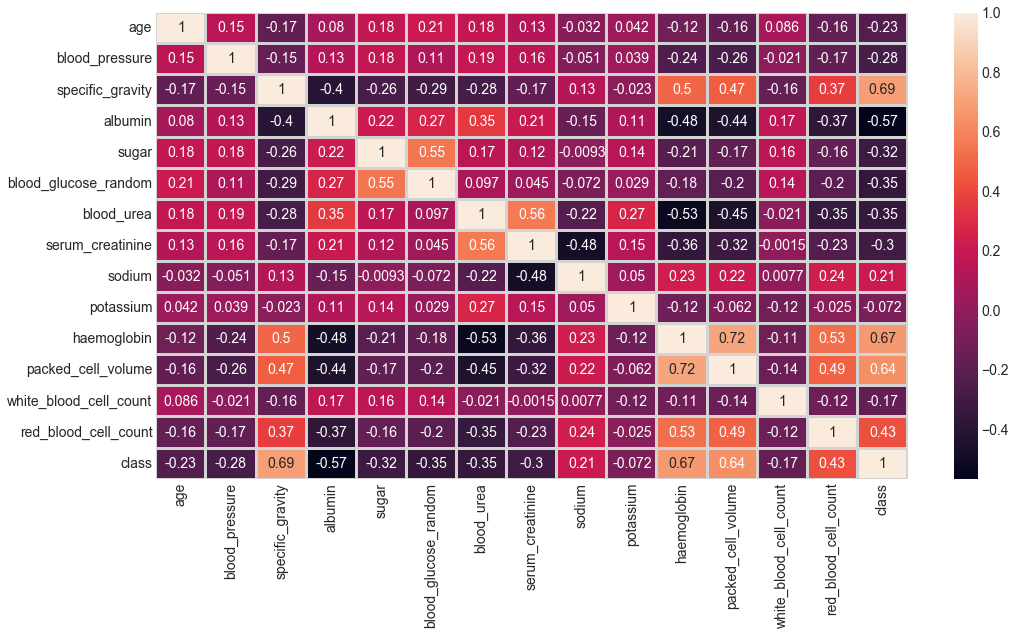

In [29]:
# heatmap of data to check the correlations between features

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

#### Label Encoding

We use label encoder to covert the categorical into numerical, all of the categorical columns have 2 categories. 

In [30]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [32]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,144.0,4.2,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,130.0,18.0,0.8,136.0,5.0,11.3,38.0,6000.0,5.6,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,5.0,9.6,31.0,7500.0,2.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,135.0,4.2,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


#### Split the Train and Test Dataset

In [33]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [34]:
print(y.shape)

(400,)


In [35]:
# Splitting data intp training and test set
# Set seed to ensure reproducibility of the result
import random
random.seed(9001)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#### Features Selection by Recursive Feature Elimination (RFE)

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# Feature extraction
model = RandomForestRegressor(n_estimators=100, random_state=0)
rfe = RFE(model)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 12
Selected Features: [False False  True  True False False False False False  True  True  True
 False  True  True  True  True False  True  True False False  True False]
Feature Ranking: [ 2  5  1  1  8  3  9 11 10  1  1  1  6  1  1  1  1  4  1  1 12  7  1 13]


In [37]:
feats_selected = list(fit.get_feature_names_out())
feats_selected

['specific_gravity',
 'albumin',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'peda_edema']

As the above results, the final features we selected by RFE are: ['age', 'specific_gravity', 'albumin', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'haemoglobin', 'packed_cell_volume', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite']

In [38]:
df=X[feats_selected]
df['class'] = y
df

,specific_gravity,albumin,blood_glucose_random,blood_urea,serum_creatinine,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,hypertension,diabetes_mellitus,peda_edema,class
0,1.020,1.0,121.0,36.0,1.2,4.2,15.4,44.0,7800.0,1,1,0,0
1,1.020,4.0,130.0,18.0,0.8,5.0,11.3,38.0,6000.0,0,0,0,0
2,1.010,2.0,423.0,53.0,1.8,5.0,9.6,31.0,7500.0,0,1,0,0
3,1.005,4.0,117.0,56.0,3.8,2.5,11.2,32.0,6700.0,1,0,1,0
4,1.010,2.0,106.0,26.0,1.4,4.2,11.6,35.0,7300.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020,0.0,140.0,49.0,0.5,4.9,15.7,47.0,6700.0,0,0,0,1
396,1.025,0.0,75.0,31.0,1.2,3.5,16.5,54.0,7800.0,0,0,0,1
397,1.020,0.0,100.0,26.0,0.6,4.4,15.8,49.0,6600.0,0,0,0,1
398,1.025,0.0,114.0,50.0,1.0,4.9,14.2,51.0,7200.0,0,0,0,1


In [39]:
X_train = X_train[feats_selected]
X_test = X_test[feats_selected]

In [40]:
X_train

,specific_gravity,albumin,blood_glucose_random,blood_urea,serum_creatinine,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,hypertension,diabetes_mellitus,peda_edema
92,1.010,3.0,219.0,82.0,3.6,4.4,10.4,33.0,5600.0,1,1,0
223,1.010,0.0,303.0,30.0,1.3,4.1,13.0,38.0,9200.0,1,1,0
234,1.010,0.0,208.0,19.0,1.3,3.8,15.0,44.0,4100.0,1,0,0
232,1.015,1.0,122.0,20.0,13.3,4.7,12.6,28.0,5800.0,0,0,1
377,1.020,0.0,97.0,27.0,0.7,4.8,13.8,49.0,6400.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
323,1.025,0.0,130.0,30.0,1.1,5.0,15.9,45.0,7800.0,0,0,0
192,1.015,0.0,130.0,16.0,0.9,5.2,15.2,43.0,10800.0,0,0,0
117,1.020,0.0,219.0,36.0,1.3,3.7,12.5,37.0,9800.0,0,0,0
47,1.010,3.0,99.0,17.0,0.8,3.0,15.0,45.0,8600.0,0,0,0


# Model Construction

#### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)
# Generating the accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Precision:  0.6744186046511628
Recall:  0.6041666666666666
Training Accuracy of KNN is 0.7821428571428571
Test Accuracy of KNN is 0.725 

Confusion Matrix :- 
[[58 14]
 [19 29]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78        72
           1       0.67      0.60      0.64        48

    accuracy                           0.73       120
   macro avg       0.71      0.70      0.71       120
weighted avg       0.72      0.72      0.72       120



#### Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)

# Generating the accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Precision:  1.0
Recall:  0.9375
Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [43]:
# Using GridSearch CV to do hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [44]:
# Print the best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}
0.9892857142857142


In [45]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# Generating the the accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9714285714285714
Test Accuracy of Decision Tree Classifier is 0.9166666666666666 

Confusion Matrix :- 
[[66  6]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        72
           1       0.88      0.92      0.90        48

    accuracy                           0.92       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



#### Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

y_pred = rd_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)
# Generating the accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Precision:  1.0
Recall:  0.9375
Training Accuracy of Random Forest Classifier is 0.9964285714285714
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



#### Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Generating the accuracy score, confusion matrix and classification report of gradient boosting classifier
y_pred = gb.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Precision:  1.0
Recall:  0.9375
Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



#### XgBoost

In [48]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)
# Generating the accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Precision:  1.0
Recall:  0.9583333333333334
Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



#### Cat Boost Classifier

In [49]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.4990462	total: 136ms	remaining: 1.22s
1:	learn: 0.3852042	total: 137ms	remaining: 547ms
2:	learn: 0.2998250	total: 138ms	remaining: 321ms
3:	learn: 0.2505670	total: 138ms	remaining: 208ms
4:	learn: 0.1993168	total: 139ms	remaining: 139ms
5:	learn: 0.1699023	total: 140ms	remaining: 93.5ms
6:	learn: 0.1489604	total: 142ms	remaining: 60.7ms
7:	learn: 0.1320927	total: 142ms	remaining: 35.6ms
8:	learn: 0.1204579	total: 143ms	remaining: 15.9ms
9:	learn: 0.1080318	total: 144ms	remaining: 0us


In [50]:
# Generating the accuracy score, confusion matrix and classification report of cat boost
y_pred = cat.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Precision:  1.0
Recall:  0.9583333333333334
Training Accuracy of Cat Boost Classifier is 0.9928571428571429
Test Accuracy of Cat Boost Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## Model Comaprison

In [51]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
gb = GradientBoostingClassifier()
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
cat = CatBoostClassifier(iterations=10)

a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'Precision':[],'Recall':[],'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()
# Evalution matrix for all the algorithms

MM = [knn,dtc,rd_clf,gb,xgb,cat]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'Precision': metrics.precision_score(y_test, y_pred),
               'Recall': metrics.recall_score(y_test, y_pred),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  KNeighborsClassifier()
Mean Absolute Error (MAE): 0.275
Mean Squared Error (MSE): 0.275
Root Mean Squared Error (RMSE): 0.524
R2_score: -0.145833
Root Mean Squared Log Error (RMSLE): -0.645
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  -0.219166
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Mean Absolute Error (MAE): 0.025
Mean Squared Error (MSE): 0.025
Root Mean Squared Error (RMSE): 0.158
R2_score: 0.895833
Root Mean Squared Log Error (RMSLE): -1.844
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  0.889166
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)
Mean Absolute Error (MAE): 0.017
Mean Squared Error (MSE): 0.017
Root Mean Squared 

In [52]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier',  'XgBoost', 'Cat Boost'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, gb_acc, xgb_acc, cat_acc]
})
[knn,dtc,rd_clf,gb,xgb,cat]

models.sort_values(by = 'Score', ascending = False)


,Model,Score
4,XgBoost,0.983333
5,Cat Boost,0.983333
2,Random Forest Classifier,0.975000
3,Gradient Boosting Classifier,0.975000
1,Decision Tree Classifier,0.916667
0,KNN,0.725000


#### Model Validation

#### We applied K-fold Stratified Cross Validation to further check the model's accuracy on different test dataset. In addition, 
#### Since our model's accuracy is quite good, we use the CV to check whether our models have the risk of overfitting or not.

In [54]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 0
classifiers = []

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
gb = GradientBoostingClassifier()
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
cat = CatBoostClassifier(iterations=10)

classifiers.append(knn)
classifiers.append(dtc)
classifiers.append(rd_clf)
classifiers.append(gb)
classifiers.append(xgb)
classifiers.append(cat)

In [55]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier',  'XgBoost', 'Cat Boost']})
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.564286,0.085714,KNN
1,0.982143,0.023958,Decision Tree Classifier
2,0.996429,0.010714,Random Forest Classifier
3,0.985714,0.017496,Gradient Boosting Classifier
4,0.982143,0.023958,XgBoost
5,0.978571,0.023690,Cat Boost


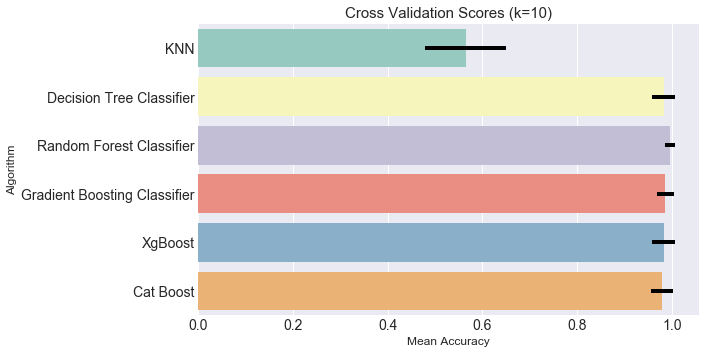

In [56]:
plt.figure(figsize = (8,5))
g = sns.barplot(data = cv_res, x='CrossValMeans',y='Algorithm',palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_ylabel("Algorithm", fontsize = 12)
g.set_xlabel("Mean Accuracy", fontsize = 12)
g = g.set_title("Cross Validation Scores (k=10)", fontsize=15)
plt.show()

#### As XGboost is so efficient and accurate, we choose XGboost as our final Model

### Feature Importance Exploration

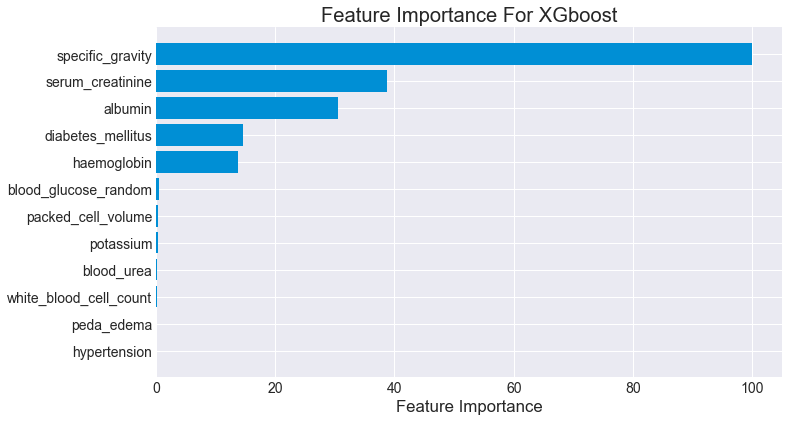

In [58]:
# Feature Importance For XGboost

feature_importance = xgb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance For XGboost')
plt.show()

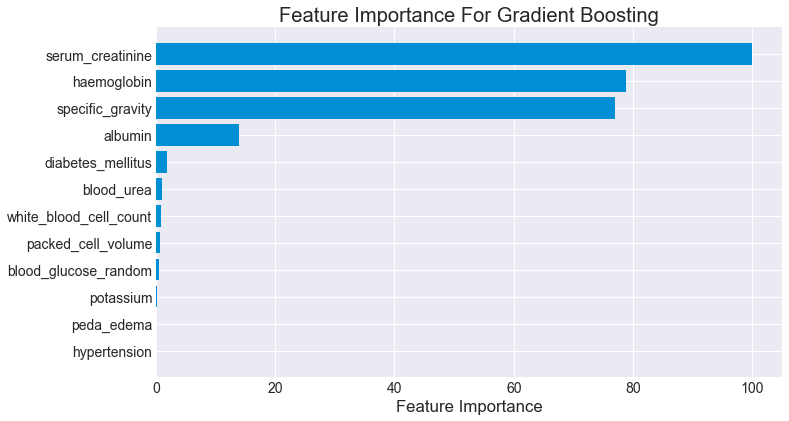

In [59]:
# Feature Importance For Gradient Boosting

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance For Gradient Boosting')
plt.show()

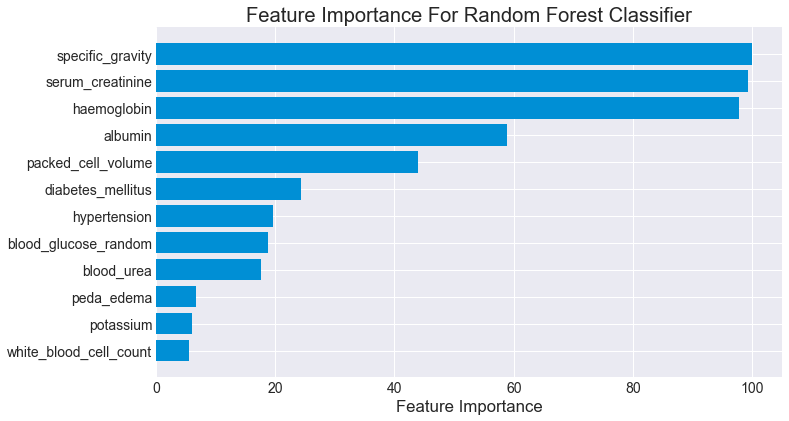

In [60]:
# Feature Importance For Random Forest Classifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)
feature_importance = rd_clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance For Random Forest Classifier')
plt.show()

Learning rate set to 0.408198
0:	learn: 0.4990462	total: 939us	remaining: 8.45ms
1:	learn: 0.3852042	total: 2.22ms	remaining: 8.88ms
2:	learn: 0.2998250	total: 3.28ms	remaining: 7.65ms
3:	learn: 0.2505670	total: 4.18ms	remaining: 6.27ms
4:	learn: 0.1993168	total: 4.77ms	remaining: 4.77ms
5:	learn: 0.1699023	total: 5.57ms	remaining: 3.71ms
6:	learn: 0.1489604	total: 6.6ms	remaining: 2.83ms
7:	learn: 0.1320927	total: 7.46ms	remaining: 1.86ms
8:	learn: 0.1204579	total: 8.39ms	remaining: 932us
9:	learn: 0.1080318	total: 9.36ms	remaining: 0us


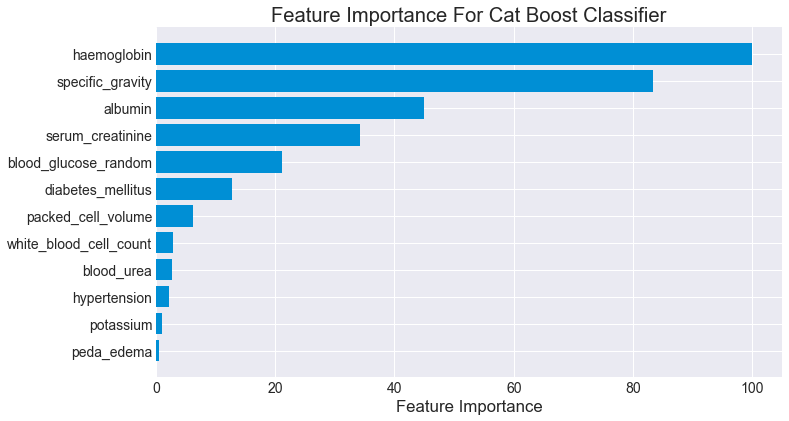

In [61]:
# Feature Importance For Cat Boost Classifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)
feature_importance = cat.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance For Cat Boost Classifier')
plt.show()